In [1]:
from keras.models import Model
from keras import backend as K
from keras import layers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Conv2DTranspose
from keras.models import Model
import numpy as np

Using TensorFlow backend.


## CAE Conv2DTranspose

In [2]:
def CAE_Conv2DTranspose(input_shape=(128, 128, 1), filters=[32, 64, 128, 256, 512, 1024, 3]):
    
    '''
    CAE_Upsampling2D convolutional autoencoder model.
    
    Arguments:
        img_shape: (128, 128, 1)
        filters: [32, 64, 128, 256, 512, 1024, 3]
    
    return:
        Models of autoencoder and encoder
            (autoencoder, encoder)
            
        outputs:
            autoencoder: encoded
            encoder: decoded
    '''
    
    input_img = Input(shape=input_shape)
    
    #Encoder
    x = Conv2D(filters[0], 3, strides=2, padding='same', activation='relu', name='conv1', input_shape=input_shape)(input_img)
    x = Conv2D(filters[1], 3, strides=2, padding='same', activation='relu', name='conv2')(x)
    x = Conv2D(filters[2], 3, strides=2, padding='same', activation='relu', name='conv3')(x)
    x = Conv2D(filters[3], 3, strides=2, padding='same', activation='relu', name='conv4')(x)
    x = Conv2D(filters[4], 3, strides=2, padding='same', activation='relu', name='conv5')(x)
    x = Conv2D(filters[5], 3, strides=2, padding='same', activation='relu', name='conv6')(x)
    
    x = Flatten()(x)
    
    encoded = Dense(units=filters[6], name='embedding')(x)
    
    #Decoder
    x = Dense(units=filters[5]*int(input_shape[0]/32)*int(input_shape[0]/32), activation='relu')(encoded)

    # Reshape into an image of the same shape as before our last `Flatten` layer
    x = Reshape((int(input_shape[0]/32), int(input_shape[0]/32), filters[5]))(x)
    
    x = Conv2DTranspose(filters[3], 3, strides=2, padding='same', activation='relu', name='deconv5')(x)
    x = Conv2DTranspose(filters[2], 3, strides=2, padding='same', activation='relu', name='deconv4')(x)
    x = Conv2DTranspose(filters[1], 3, strides=2, padding='same', activation='relu', name='deconv3')(x)
    x = Conv2DTranspose(filters[0], 3, strides=2, padding='same', activation='relu', name='deconv2')(x)

    decoded = Conv2DTranspose(input_shape[2], 3, strides=2, padding='same', name='deconv1')(x)
    
    return Model(inputs=input_img, outputs=decoded, name='CAE_Conv2DTranspose'), Model(inputs=input_img, outputs=encoded, name='CE')

In [3]:
autoencoder, encoder = CAE_Conv2DTranspose()
encoder.summary()
autoencoder.summary()

Model: "CE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        320       
_________________________________________________________________
conv2 (Conv2D)               (None, 32, 32, 64)        18496     
_________________________________________________________________
conv3 (Conv2D)               (None, 16, 16, 128)       73856     
_________________________________________________________________
conv4 (Conv2D)               (None, 8, 8, 256)         295168    
_________________________________________________________________
conv5 (Conv2D)               (None, 4, 4, 512)         1180160   
_________________________________________________________________
conv6 (Conv2D)               (None, 2, 2, 1024)        4719616  

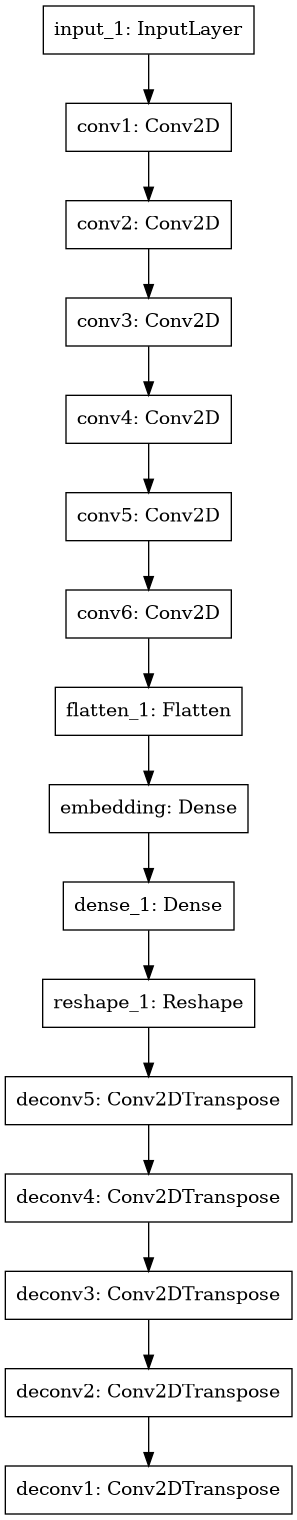

In [6]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='model.png')

## CAE UpSampling2D

In [76]:
def CAE_Upsampling2D(input_shape=(128, 128, 1), filters=[32, 64, 128, 256, 512, 1024, 3]):
    
    '''
    CAE_Upsampling2D convolutional autoencoder model.
    Arguments:
        img_shape: (128, 128, 1)
        filters: [32, 64, 128, 256, 512, 1024, 3]
    return:
        (autoencoder, encoder): Models of autoencoder and encoder
    '''
    
    input_img = Input(shape=input_shape)
    #Encoder
    x = Conv2D(filters[0], 3, strides=2, padding='same', activation='relu', name='conv1', input_shape=input_shape)(input_img)
    x = Conv2D(filters[1], 3, strides=2, padding='same', activation='relu', name='conv2')(x)
    x = Conv2D(filters[2], 3, strides=2, padding='same', activation='relu', name='conv3')(x)
    x = Conv2D(filters[3], 3, strides=2, padding='same', activation='relu', name='conv4')(x)
    x = Conv2D(filters[4], 3, strides=2, padding='same', activation='relu', name='conv5')(x)
    x = Conv2D(filters[5], 3, strides=2, padding='same', activation='relu', name='conv6')(x)
    shape_before_flattening = K.int_shape(x)
    
    x = Flatten()(x)
    
    encoded = Dense(units=filters[6], name='embedding')(x)
    
    #Decoder
    x = Dense(units=filters[5]*int(input_shape[0]/32)*int(input_shape[0]/32), activation='relu')(encoded)

    # Reshape into an image of the same shape as before our last `Flatten` layer
    x = Reshape((int(input_shape[0]/32), int(input_shape[0]/32), filters[5]))(x)

    x = Conv2D(filters[5], 3, padding='same', activation='relu', name='conv7')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(filters[4], 3, padding='same', activation='relu', name='conv8')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(filters[3], 3, padding='same', activation='relu', name='conv9')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(filters[2], 3, padding='same', activation='relu', name='conv10')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(filters[1], 3, padding='same', activation='relu', name='conv11')(x)
    x = UpSampling2D((2, 2))(x)
    
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    return Model(inputs=input_img, outputs=decoded, name='CAE_Upsampling2D'), Model(inputs=input_img, outputs=encoded, name='CE')


In [78]:
autoencoder, encoder = CAE_Upsampling2D()
encoder.summary()
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        (None, 128, 128, 1)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        320       
_________________________________________________________________
conv2 (Conv2D)               (None, 32, 32, 64)        18496     
_________________________________________________________________
conv3 (Conv2D)               (None, 16, 16, 128)       73856     
_________________________________________________________________
conv4 (Conv2D)               (None, 8, 8, 256)         295168    
_________________________________________________________________
conv5 (Conv2D)               (None, 4, 4, 512)         1180160   
_________________________________________________________________
conv6 (Conv2D)               (None, 2, 2, 1024)        4719

## CAE Conv2DTranspose (old)

In [ ]:
def autoencoderConv2D_1(input_shape=(128, 128, 1), filters=[32, 64, 128, 256, 3]):
    input_img = Input(shape=input_shape)
    if input_shape[0] % 8 == 0:
        pad3 = 'same'
    else:
        pad3 = 'valid'
    x = Conv2D(filters[0], 5, strides=2, padding='same', activation='relu', name='conv1', input_shape=input_shape)(input_img)

    x = Conv2D(filters[1], 5, strides=2, padding='same', activation='relu', name='conv2')(x)

    x = Conv2D(filters[2], 3, strides=2, padding='same', activation='relu', name='conv3')(x)
    
    x = Flatten()(x)
    
    encoded = Dense(units=filters[3], name='embedding')(x)
    
    y = Dense(units=filters[4], name='output_to_cluster')(encoded)
    
    x = Dense(units=filters[2]*int(input_shape[0]/8)*int(input_shape[0]/8), activation='relu')(encoded)

    x = Reshape((int(input_shape[0]/8), int(input_shape[0]/8), filters[2]))(x)
    
    x = Conv2DTranspose(filters[1], 3, strides=2, padding='same', activation='relu', name='deconv3')(x)

    x = Conv2DTranspose(filters[0], 5, strides=2, padding='same', activation='relu', name='deconv2')(x)

    decoded = Conv2DTranspose(input_shape[2], 5, strides=2, padding='same', name='deconv1')(x)
    
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=y, name='encoder')